In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%pylab inline
pylab.rcParams['figure.figsize'] = 12, 8 

Populating the interactive namespace from numpy and matplotlib


In [193]:
df = pd.read_csv('times_50chnk.csv')

In [194]:
df.columns = ['iters', 'time_class', 'time_insert'];
df.set_index('iters');

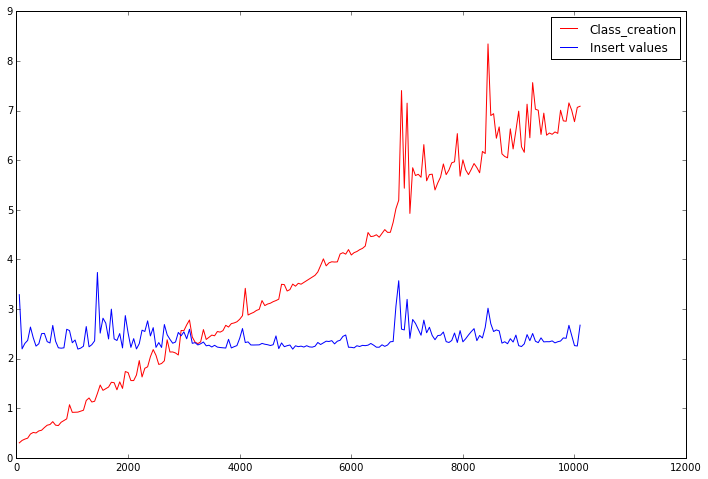

In [195]:
plt.plot(df.iters, df.time_class/1000.0, color='red', label='Class_creation')
plt.plot(df.iters, df.time_insert/1000.0, color='blue', label='Insert values')
plt.legend();

In [196]:
actual_vals = ~df.time_class.isnull()

In [197]:
#Get rid of any nan values (if program cut short before DF filled)
iters = df.iters[actual_vals]
class_vals =df.time_class[actual_vals]

In [198]:
chunks = arange(0, len(iters))

In [199]:
#Super quick and nasty linear regression for time against NUMBER OF CHUNKS
# Only use first 6000 values as get noise after that (maybe using chrome?)
slope, intercept, r, p, stderror = stats.linregress(chunks[chunks<=120], class_vals[chunks<=120])
# All values...
# slope_a, intercept_a, r, p, stderror = stats.linregress(iters, class_vals)

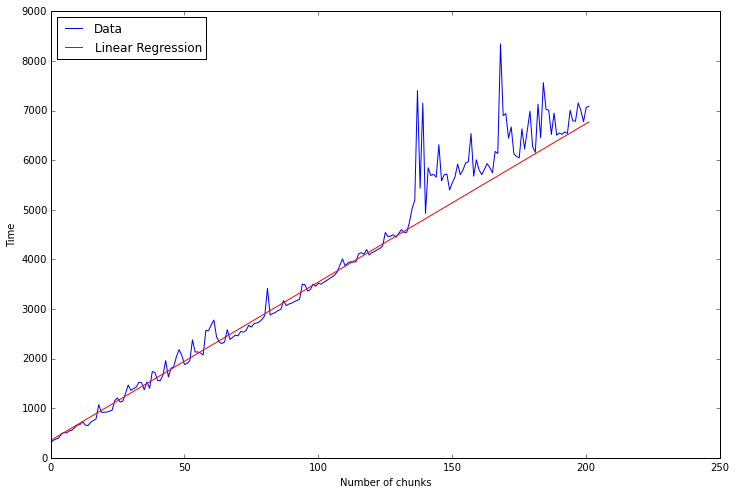

In [200]:
#Plot regression alongside data
plt.plot(chunks, class_vals, color='blue', label = 'Data');
plt.plot(chunks, chunks*slope+intercept, color='red', label='Linear Regression');
plt.ylabel('Time')
plt.xlabel('Number of chunks')
plt.legend(loc='upper left');
# All values...
# plt.plot(iters, iters*slope_a+intercept_a, color='green')

In [203]:
#Estimate time for program to run using constant average value of inserts 
#and integral of table creation values for each chunk
#Total names
total_names = 88496
#Note: total inserts is number of years * number of names
# total_inserts = (2011-1880) * total_tabs
chunk_size = 50.0
#Total number of chunks we will need to go through for all data
tot_num_chunks = int(ceil(total_names / chunk_size))
#Average insert time per chunk based on data
mean_insert_cost = df.time_insert[chunks<=120].mean()
#Total insert time for all chunks
total_insert_cost = mean_insert_cost * tot_num_chunks
#Array with all chunks we would need
all_chunks = arange(0,tot_num_chunks)
#Total time by summing predicted class cost over all chunks
total_class_cost = sum(all_chunks*slope+intercept)
#Sum class and insert times to get total time
total_cost = total_insert_cost + total_class_cost
#Convert total time to minutes
time_mins = total_cost / (60*1000)
#Convert to hours
time_hrs = time_mins/60